In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

# Dataset

In [2]:
script_dir = os.path.dirname("Handling_Skewness")
data_path = os.path.join(script_dir, '../train.csv')

In [4]:
df_train = pd.read_csv(data_path)

In [5]:
df_train.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# skewness

Positive Skewed data

In [11]:
df_train['LotArea'].skew()

12.207687851233496

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

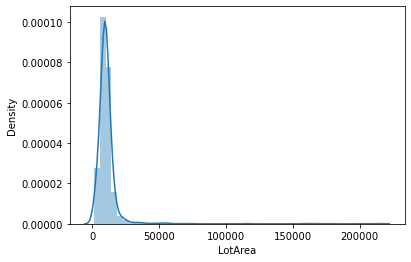

In [12]:
sns.distplot(df_train['LotArea'])

# Handling Skewed Data

Reference: https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725

Skewed data affects on model's ability (not tree based models).
Right skewed data will predict better on data points with lower value as compared to those with higher values.

1.log transformation

2.Remove outliers

3.Normalize (min-max) or (Z-scale) : 
Normalization or scaling refers to bringing all the columns into same range.

4.Cube root: when values are too large. Can be applied on negative values (This method is not applicapable since there are no negative values

5.Square root: applied only to positive values

6.Reciprocal

7.Square: apply on left skew

### Why are we handling skewed data? 

The main idea behind normalization/standardization is always the same.

Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias.

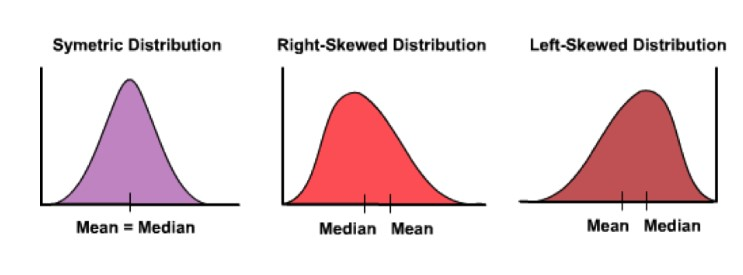

In [41]:
from IPython.display import Image
Image(filename='Skew_Data.jpg') 

### 1. Log Transformation

Log Transformation transforms big numbers to large which increases normality

It reduces complexity on calculation and decreases skewness and kurtosis (첨도, 분포도의 몰림 중간이 뾰족할수록 더 높음)

In [15]:
df_log1 = np.log(df_train['LotArea'])
print(df_log1.skew())

-0.1379938086958118


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

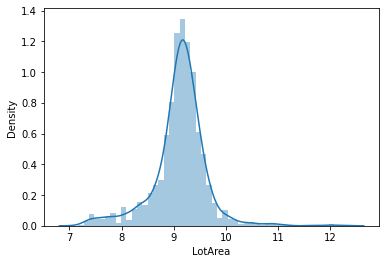

In [16]:
sns.distplot(df_log1)

We can see that skewness has decreased

### 2. Removing Outliers

There are two ways to remove out liers,

 Z-score treatment 
 
 and
 
 IQR based filtering
 
 Since our Data is skewed it fits more with IQR based filtering
 

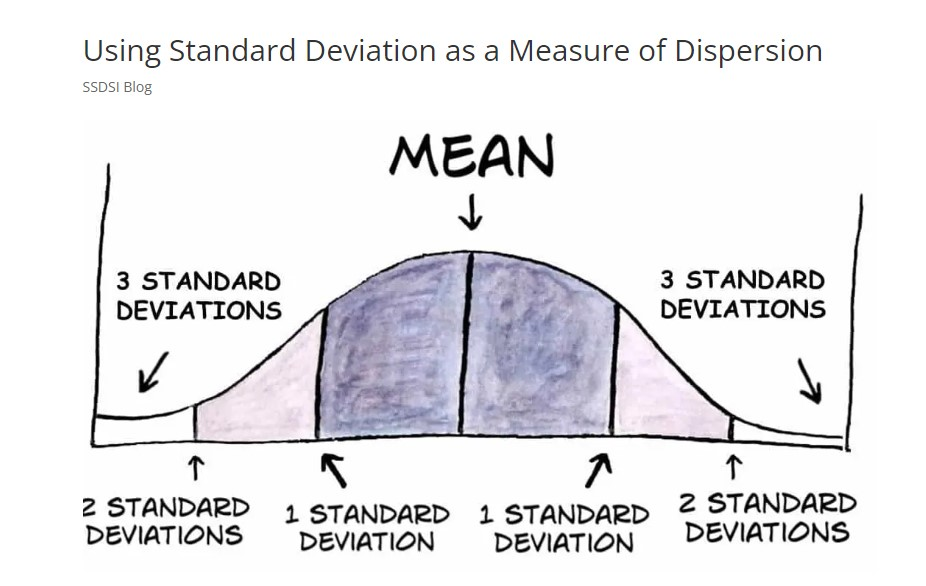

In [48]:
Image(filename='SD.jpg') 
#https://sixsigmadsi.com/standard-deviation-measure-of-dispersion/

<AxesSubplot:>

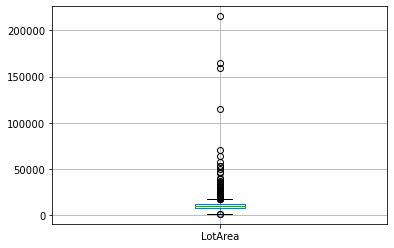

In [35]:
df_train.boxplot('LotArea')

### Finding the Boundary Values

In [36]:
print("Highest allowed",df_train['LotArea'].mean() + 3*df_train['LotArea'].std())
print("Lowest allowed",df_train['LotArea'].mean() - 3*df_train['LotArea'].std())

Highest allowed 40460.62287932922
Lowest allowed -19426.966714945658


In [38]:
#1SD
df_train['LotArea'].std()

9981.264932379147

### Finding Outliers

In [42]:
df_train[(df_train['LotArea'] < -19426) | (df_train['LotArea'] > 40460)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
661,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000


In [43]:
new_df = df_train[(df_train['LotArea'] > -19426) | (df_train['LotArea'] < 40460)]
new_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [44]:
upper_limit = df_train['LotArea'].mean() + 3*df_train['LotArea'].std()
lower_limit = df_train['LotArea'].mean() - 3*df_train['LotArea'].std()

In [45]:
df_train['LotArea'] = np.where(
    df_train['LotArea']>upper_limit,
    upper_limit,
    np.where(
        df_train['LotArea']<lower_limit,
        lower_limit,
        df_train['LotArea']
    )
)

In [46]:
df_train['LotArea'].describe()

count     1460.000000
mean     10090.655546
std       5224.271885
min       1300.000000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      40460.622879
Name: LotArea, dtype: float64

### Second Method of IQR Based Filtering

### Finding the IQR

In [5]:
percentile25 = df_train['LotArea'].quantile(0.25)
percentile75 = df_train['LotArea'].quantile(0.75)
iqr = percentile75 - percentile25

###  Finding upper and lower limit

In [6]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

### Finding Outliers

In [30]:
upper_limit

17673.5

In [31]:
df_train[df_train['LotArea'] > upper_limit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
66,67,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,180000
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
120,121,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000
159,160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
1409,1410,60,RL,46.0,20544,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2008,WD,Normal,215000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970
1430,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140


In [33]:
df_train[df_train['LotArea'] < lower_limit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
1039,1040,180,RM,21.0,1477,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,80000


In [14]:
df_train.shape

(1460, 81)

### Trimming

Only lower ones are there

In [34]:
new_df = df_train[(df_train['LotArea'] > lower_limit) & (df_train['LotArea'] < upper_limit)]

new_df.shape

(1391, 81)

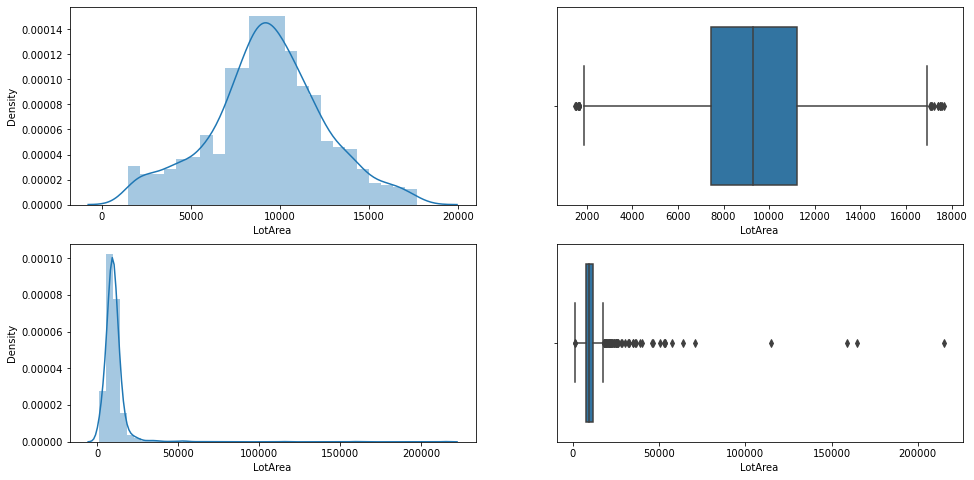

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['LotArea'])
plt.subplot(2,2,2)
sns.boxplot(new_df['LotArea'])
plt.subplot(2,2,3)
sns.distplot(df_train['LotArea'])
plt.subplot(2,2,4)
sns.boxplot(df_train['LotArea'])
plt.show()

In [37]:
df_train['LotArea'].skew()

12.207687851233496

In [36]:
new_df['LotArea'].skew()

-0.07495520247728489

### We could see decent result on this method

## 3.Normalize (min-max)


The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

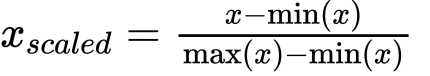

In [45]:
# Mathmatical basis
#from sklearn.preprocessing import MinMaxScaler

Image(filename='math.png') 
#https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79

In [50]:
df_train2 = df_train[['LotArea']]

In [53]:
# apply normalization techniques
for column in df_train2:
    df_train2[column] = (df_train2[column] - df_train2[column].min()) / (df_train2[column].max() - df_train2[column].min())    
  
# view normalized data
print(df_train2)

       LotArea
0     0.033420
1     0.038795
2     0.046507
3     0.038561
4     0.060576
...        ...
1455  0.030929
1456  0.055505
1457  0.036187
1458  0.039342
1459  0.040370

[1460 rows x 1 columns]


In [56]:
df_train['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [54]:
df_train2.skew()

LotArea    12.207688
dtype: float64

In [60]:
df_train['LotArea'].skew()

12.207687851233496

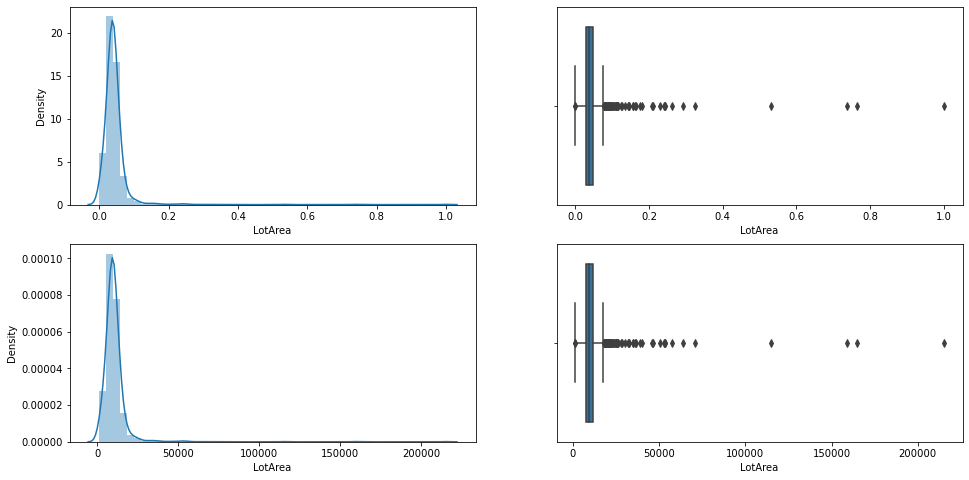

In [59]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_train2['LotArea'])
plt.subplot(2,2,2)
sns.boxplot(df_train2['LotArea'])
plt.subplot(2,2,3)
sns.distplot(df_train['LotArea'])
plt.subplot(2,2,4)
sns.boxplot(df_train['LotArea'])
plt.show()

### Result: it didn't show significant difference in skewness but the data range has been decreased to 0 ~ 1